In [1]:
import numpy as np
import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
import imblearn
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,f1_score

In [2]:
df=pd.read_csv('loan_prediction.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
df=df.drop(columns=["Loan_ID"],axis=1)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [5]:
df.shape

(614, 12)

# Univariate analysis

C:\Users\GOKUL M\AppData\Local\Temp\ipykernel_12048\3368073835.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


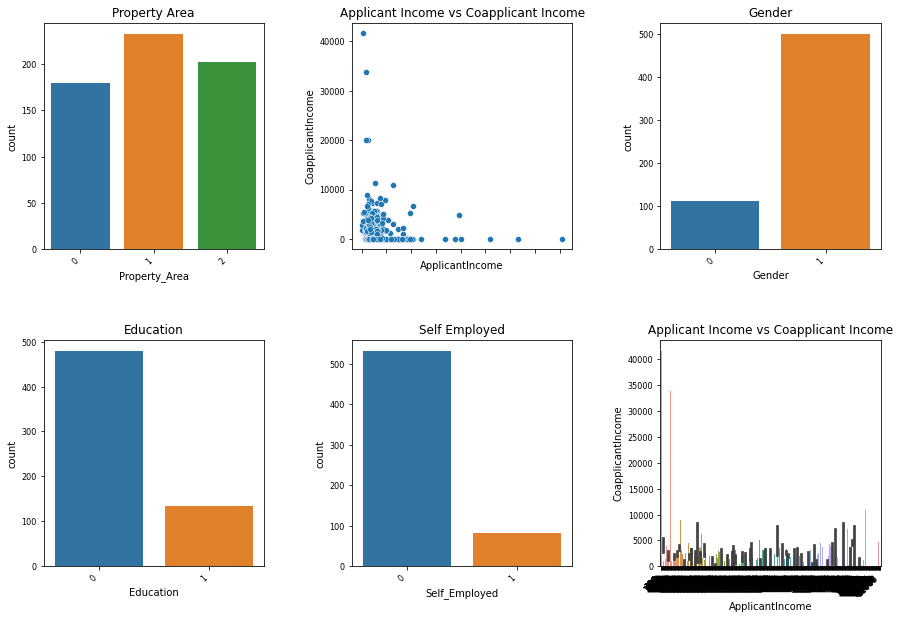

In [53]:

plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=8)


fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
plt.subplots_adjust(wspace=0.4, hspace=0.4)  # Adjust spacing between plots

# Plotting each subplot
sns.countplot(ax=axes[0, 0], data=df, x='Property_Area')
sns.scatterplot(ax=axes[0, 1], data=df, x='ApplicantIncome', y='CoapplicantIncome')
sns.countplot(ax=axes[0, 2], data=df, x='Gender')
sns.countplot(ax=axes[1, 0], data=df, x='Education')
sns.countplot(ax=axes[1, 1], data=df, x='Self_Employed')
sns.barplot(ax=axes[1, 2], data=df, x='ApplicantIncome', y='CoapplicantIncome')

# Adding titles
axes[0, 0].set_title('Property Area')
axes[0, 1].set_title('Applicant Income vs Coapplicant Income')
axes[0, 2].set_title('Gender')
axes[1, 0].set_title('Education')
axes[1, 1].set_title('Self Employed')
axes[1, 2].set_title('Applicant Income vs Coapplicant Income')


for ax in axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show()


([<matplotlib.patches.Wedge at 0x2d0928cba00>,
 [Text(0.40661098511372595, 1.0220897743275028, 'Semi urban'),
  Text(-1.0582795633383781, -0.3000739339235115, 'Urban'),
  Text(0.67000963198199, -0.8724030565348555, 'Rural')])

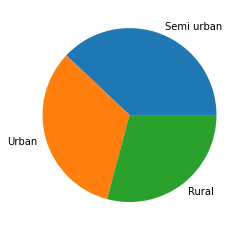

In [7]:
plt.pie(df.Property_Area.value_counts(),[0,0,0],labels=['Semi urban','Urban','Rural'])


([<matplotlib.patches.Wedge at 0x2d091c48040>,
 [Text(-0.8514262161117528, 0.6964721089301588, 'Graduate'),
  Text(0.8514262161117524, -0.6964721089301593, 'Not Graduate')])

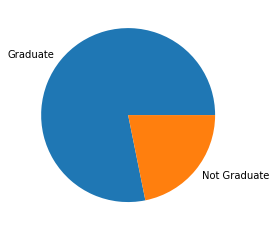

In [8]:
plt.pie(df.Education.value_counts(),[0,0],labels=['Graduate','Not Graduate'])

# Bivariate analysis

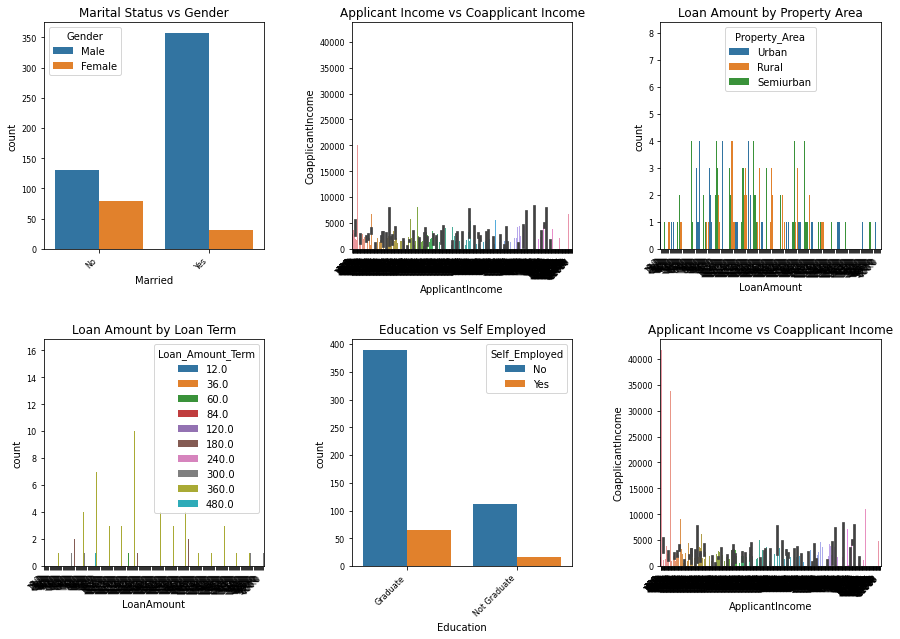

In [10]:

plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=8)


fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
plt.subplots_adjust(wspace=0.4, hspace=0.4)  # Adjust spacing between plots

# Plotting each subplot
sns.countplot(ax=axes[0, 0], data=df, x='Married', hue='Gender')
sns.barplot(ax=axes[0, 1], data=df, x='ApplicantIncome', y='CoapplicantIncome')
sns.countplot(ax=axes[0, 2], data=df, x='LoanAmount', hue='Property_Area')
sns.countplot(ax=axes[1, 0], data=df, x='LoanAmount', hue='Loan_Amount_Term')
sns.countplot(ax=axes[1, 1], data=df, x='Education', hue='Self_Employed')
sns.barplot(ax=axes[1, 2], data=df, x='ApplicantIncome', y='CoapplicantIncome')

# Adding titles
axes[0, 0].set_title('Marital Status vs Gender')
axes[0, 1].set_title('Applicant Income vs Coapplicant Income')
axes[0, 2].set_title('Loan Amount by Property Area')
axes[1, 0].set_title('Loan Amount by Loan Term')
axes[1, 1].set_title('Education vs Self Employed')
axes[1, 2].set_title('Applicant Income vs Coapplicant Income')


for ax in axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show()



# Multivariate analysis

<AxesSubplot:>

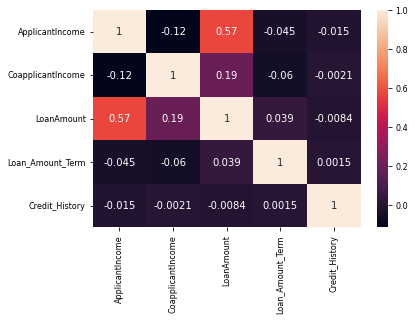

In [11]:
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:>

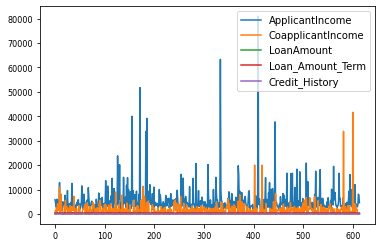

In [12]:
df.plot.line()

# Descrptive analysis

In [13]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [14]:
df.mean()


C:\Users\GOKUL M\AppData\Local\Temp\ipykernel_12048\972437606.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean()


ApplicantIncome      5403.459283
CoapplicantIncome    1621.245798
LoanAmount            146.412162
Loan_Amount_Term      342.000000
Credit_History          0.842199
dtype: float64

In [15]:
df.mode()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,Yes,0,Graduate,No,2500,0.0,120.0,360.0,1.0,Semiurban,Y


In [16]:
df.std()

C:\Users\GOKUL M\AppData\Local\Temp\ipykernel_12048\3390915376.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.std()


ApplicantIncome      6109.041673
CoapplicantIncome    2926.248369
LoanAmount             85.587325
Loan_Amount_Term       65.120410
Credit_History          0.364878
dtype: float64

In [17]:
df.count()

Gender               601
Married              611
Dependents           599
Education            614
Self_Employed        582
ApplicantIncome      614
CoapplicantIncome    614
LoanAmount           592
Loan_Amount_Term     600
Credit_History       564
Property_Area        614
Loan_Status          614
dtype: int64

# Checking for null values

In [18]:
df.isnull().any()

Gender                True
Married               True
Dependents            True
Education            False
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
Loan_Status          False
dtype: bool

In [19]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [20]:
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mean())
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
df['Married']=df['Married'].fillna(df['Married'].mode()[0])
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [21]:
df.isnull().any()

Gender               False
Married              False
Dependents           False
Education            False
Self_Employed        False
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount           False
Loan_Amount_Term     False
Credit_History       False
Property_Area        False
Loan_Status          False
dtype: bool

# Handling categorical values

In [22]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [23]:
le=LabelEncoder()
df.Gender=le.fit_transform(df.Gender)
df.Married=le.fit_transform(df.Married)
df.Education=le.fit_transform(df.Education)
df.Self_Employed=le.fit_transform(df.Self_Employed)
df.Property_Area=le.fit_transform(df.Property_Area)
df.Loan_Status=le.fit_transform(df.Loan_Status)
df.Dependents=le.fit_transform(df.Dependents)

In [24]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


In [25]:
x=df.iloc[:,:-1]
y=df.Loan_Status

In [26]:
x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2


In [27]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int32

# Scaling the data

In [28]:
x_scale=pd.DataFrame(scale(x),columns=x.columns)
x_scale.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.472343,-1.372089,-0.737806,-0.528362,-0.392601,0.072991,-0.554487,0.000000,0.279851,0.45164,1.223298
1,0.472343,0.728816,0.253470,-0.528362,-0.392601,-0.134412,-0.038732,-0.219273,0.279851,0.45164,-1.318513
2,0.472343,0.728816,-0.737806,-0.528362,2.547117,-0.393747,-0.554487,-0.957641,0.279851,0.45164,1.223298
3,0.472343,0.728816,-0.737806,1.892641,-0.392601,-0.462062,0.251980,-0.314547,0.279851,0.45164,1.223298
4,0.472343,-1.372089,-0.737806,-0.528362,-0.392601,0.097728,-0.554487,-0.064454,0.279851,0.45164,1.223298


# Splitting the dataset

In [29]:

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=10)

In [30]:
xtrain.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
245,1,0,0,0,1,6050,4333.0,120.0,180.0,1.0,2
413,1,1,0,1,0,2253,2033.0,110.0,360.0,1.0,0
126,1,1,3,0,0,23803,0.0,370.0,360.0,1.0,0
531,1,1,3,0,0,4281,0.0,100.0,360.0,1.0,2
188,1,1,0,0,1,674,5296.0,168.0,360.0,1.0,0


In [31]:
xtest.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
285,1,0,0,0,0,3158,3053.0,89.0,360.0,1.000000,0
323,0,0,0,0,0,3166,2985.0,132.0,360.0,0.842199,0
482,1,1,0,0,0,2083,3150.0,128.0,360.0,1.000000,1
173,1,1,0,0,0,5708,5625.0,187.0,360.0,1.000000,1
518,1,0,0,0,0,4683,1915.0,185.0,360.0,1.000000,1


In [32]:
ytest.head()

285    1
323    1
482    1
173    1
518    0
Name: Loan_Status, dtype: int32

In [33]:
ytrain.head()

245    0
413    1
126    1
531    1
188    1
Name: Loan_Status, dtype: int32

# Balancing the dataset

C:\Users\GOKUL M\Desktop\divyafiles\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

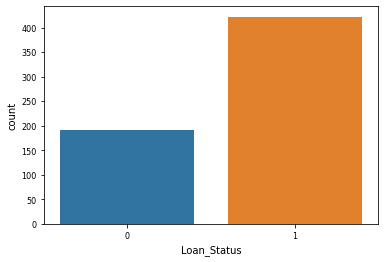

In [34]:
sns.countplot(df.Loan_Status)

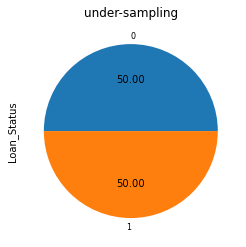

In [35]:
rus=RandomUnderSampler(sampling_strategy=1)
x_res,y_res=rus.fit_resample(x,y)
ax=y_res.value_counts().plot.pie(autopct='%.2f')
_=ax.set_title("under-sampling")

# RANDOM FOREST MODEL

In [36]:
Rmodel=RandomForestClassifier(n_estimators=100)
Rmodel.fit(x_res,y_res)

RandomForestClassifier()

In [37]:
ypredR=Rmodel.predict(xtest)


In [38]:
ypred2R=Rmodel.predict(xtrain)


In [39]:
print("Random Forest Model Testing Accuracy")
print(accuracy_score(ytest,ypredR))
print("Random Forest Model Training Accuracy")
print(accuracy_score(ytrain,ypred2R))

Random Forest Model Testing Accuracy
0.9081081081081082
Random Forest Model Training Accuracy
0.9044289044289044


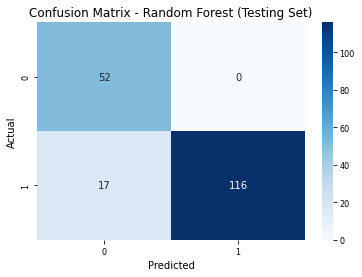

In [60]:

plt.rc('figure', figsize=(6, 4))

# confusion matrix for testing set
cm = confusion_matrix(ytest, ypredR)
plt.figure()
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest (Testing Set)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



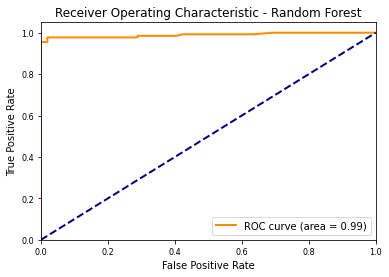

In [61]:
# ROC Curve
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(ytest, Rmodel.predict_proba(xtest)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Random Forest')
plt.legend(loc="lower right")
plt.show()

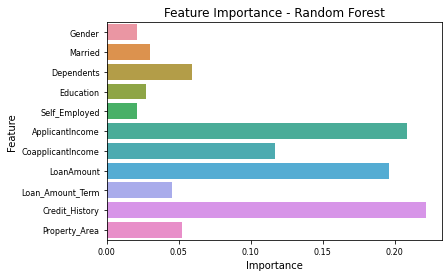

In [62]:
# Feature Importance
feature_importances = Rmodel.feature_importances_
plt.figure()
sns.barplot(x=feature_importances, y=xtrain.columns)
plt.title('Feature Importance - Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


In [63]:
# Classification report
cls_report = classification_report(ytest, ypredR)
print("Classification Report:\n", cls_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.75      1.00      0.86        52
           1       1.00      0.87      0.93       133

    accuracy                           0.91       185
   macro avg       0.88      0.94      0.90       185
weighted avg       0.93      0.91      0.91       185



# KNN MODEL

In [40]:
kmodel=KNeighborsClassifier()


In [41]:
kmodel.fit(x_res,y_res)

KNeighborsClassifier()

In [42]:
ypredk=kmodel.predict(xtest)
ypred2k=kmodel.predict(xtrain)

In [43]:
print("KNN Model Testing Accuracy")
print(accuracy_score(ytest,ypredk))
print("KNN Model Training Accuracy")
print(accuracy_score(ytrain,ypred2k))

KNN Model Testing Accuracy
0.6594594594594595
KNN Model Training Accuracy
0.6293706293706294


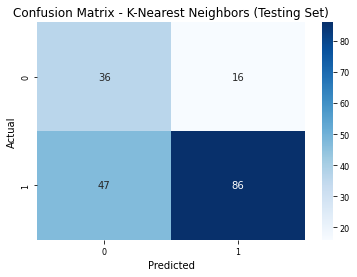

In [65]:

#  confusion matrix for testing set
cm = confusion_matrix(ytest, ypredk)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - K-Nearest Neighbors (Testing Set)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



In [66]:
# Classification report
cls_report = classification_report(ytest, ypredk)
print("Classification Report:\n", cls_report)




Classification Report:
               precision    recall  f1-score   support

           0       0.43      0.69      0.53        52
           1       0.84      0.65      0.73       133

    accuracy                           0.66       185
   macro avg       0.64      0.67      0.63       185
weighted avg       0.73      0.66      0.68       185



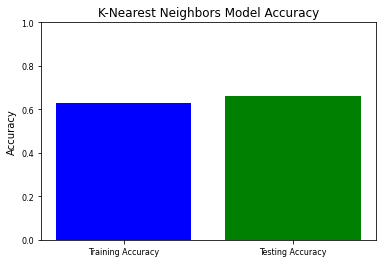

In [68]:

plt.rc('figure', figsize=(6, 4))

# Plotting training accuracy and testing accuracy
train_accuracy = kmodel.score(xtrain, ytrain)
test_accuracy = kmodel.score(xtest, ytest)
accuracies = [train_accuracy, test_accuracy]
labels = ['Training Accuracy', 'Testing Accuracy']

plt.bar(labels, accuracies, color=['blue', 'green'])
plt.title('K-Nearest Neighbors Model Accuracy')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()

# DECISION TREE MODEL

In [44]:
dmodel=DecisionTreeClassifier(random_state=100)
dmodel.fit(x_res,y_res)
DecisionTreeClassifier(random_state=100)


DecisionTreeClassifier(random_state=100)

In [45]:
ypredd=dmodel.predict(xtest)
ypred2d=dmodel.predict(xtrain)

In [46]:
print("Decision Tree Model Testing Accuracy")
print(accuracy_score(ytest,ypredd))
print("Decision Tree Model Training Accuracy")
print(accuracy_score(ytrain,ypred2d))

Decision Tree Model Testing Accuracy
0.8810810810810811
Decision Tree Model Training Accuracy
0.8811188811188811


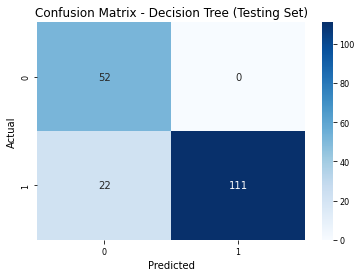

In [70]:

#  confusion matrix for testing set
cm = confusion_matrix(ytest, ypredd)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Decision Tree (Testing Set)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()




In [71]:
# Classification report
cls_report = classification_report(ytest, ypredd)
print("Classification Report:\n", cls_report)



Classification Report:
               precision    recall  f1-score   support

           0       0.70      1.00      0.83        52
           1       1.00      0.83      0.91       133

    accuracy                           0.88       185
   macro avg       0.85      0.92      0.87       185
weighted avg       0.92      0.88      0.89       185



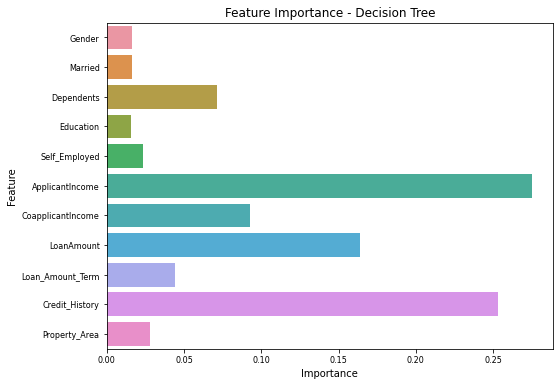

In [73]:
# Feature Importance
feature_importances = dmodel.feature_importances_
plt.figure(figsize=(8, 6))
sns.barplot(x=feature_importances, y=xtrain.columns)
plt.title('Feature Importance - Decision Tree')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()



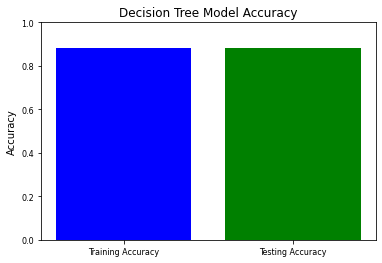

In [74]:
# Plotting training accuracy and testing accuracy
train_accuracy = dmodel.score(xtrain, ytrain)
test_accuracy = dmodel.score(xtest, ytest)
accuracies = [train_accuracy, test_accuracy]
labels = ['Training Accuracy', 'Testing Accuracy']

plt.bar(labels, accuracies, color=['blue', 'green'])
plt.title('Decision Tree Model Accuracy')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()

# By comparing all the moels we choose  RANDOM FOREST MODEL due its hih accuracy

In [47]:
f1_score(ypredR,ytest,average='weighted')

0.9047897643735541

In [48]:
 pd.crosstab(ytest,ypredR)

col_0,0,1
Loan_Status,,
0,52,0
1,17,116


In [49]:
print(confusion_matrix(ytest,ypredR))

[[ 52   0]
 [ 17 116]]


In [50]:
print(classification_report(ytest,ypredR))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86        52
           1       1.00      0.87      0.93       133

    accuracy                           0.91       185
   macro avg       0.88      0.94      0.90       185
weighted avg       0.93      0.91      0.91       185



# SAVE THE MODEL

In [52]:
with open('Rmodel.pkl', 'wb') as model_file:
    pickle.dump(Rmodel, model_file)


with open('scale.pkl', 'wb') as scale_file:
    pickle.dump(x_scale, scale_file)
